<a href="https://colab.research.google.com/github/HeHeHuang/DeepLearningNLP/blob/main/TextClassification_GenderFromName.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analytic Object
> Use Neural Network model to fit to data in Tensorflow and use this model to predict gender. 

In [ ]:
!pip install keras==2.3.1
!pip install tensorflow==2.1.0
!pip install plot_keras_history
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 12.4 MB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires keras<2.9,>=2.8.0rc0, but you have keras 2.3.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 421.8 MB 29 kB/s 
     |████████████████████████████████| 3.8 MB 55.6 MB/s 
     |████████████████████████████████| 448 kB 68.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554

In [ ]:
import pandas as pd
import numpy as np
import re

import tensorflow as tf
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Flatten, MaxPooling1D, Input, Concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1,l2

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

import matplotlib.pyplot as plt
from plot_keras_history import plot_history

Using TensorFlow backend.


## Load Data and Data Visualization

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/name_gender.csv')

In [ ]:
df.head()

,name,gender
0,Aaban&&,M
1,Aabha*,F
2,Aabid,M
3,Aabriella,F
4,Aada_,F


## Data Cleaning

In [ ]:
def pre_process(name):
  after_process_name= ''.join(re.split(r'[^A-Za-z]', name)) 
  after_process_name = after_process_name.lower()
  return after_process_name

In [ ]:
df['name'] = df['name'].apply(pre_process)
df

,name,gender
0,aaban,M
1,aabha,F
2,aabid,M
3,aabriella,F
4,aada,F
...,...,...
95020,zyvion,M
95021,zyvon,M
95022,zyyanna,F
95023,zyyon,M


In [ ]:
names = df['name']
names

0            aaban
1            aabha
2            aabid
3        aabriella
4             aada
           ...    
95020       zyvion
95021        zyvon
95022      zyyanna
95023        zyyon
95024        zzyzx
Name: name, Length: 95025, dtype: object

## Data Visualization

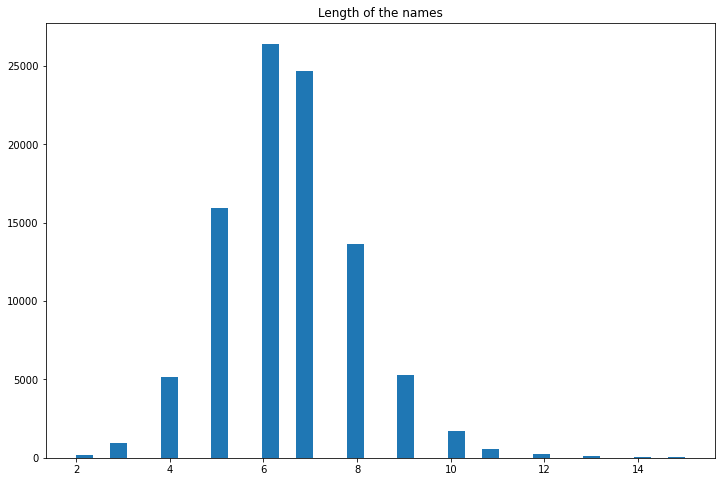

In [ ]:
plt.figure(figsize=(12,8))
plt.hist([len(a) for a in names], bins=36)
plt.title("Length of the names")
plt.show()

In [ ]:
print("Male : " + str(sum(df['gender']=='M')))
print("Female : " + str(sum(df['gender']=='F')))

Male : 34721
Female : 60304


### data is not balance

In [ ]:
X=df['name']
X

0            aaban
1            aabha
2            aabid
3        aabriella
4             aada
           ...    
95020       zyvion
95021        zyvon
95022      zyyanna
95023        zyyon
95024        zzyzx
Name: name, Length: 95025, dtype: object

In [ ]:
y=df['gender']
y

0        M
1        F
2        M
3        F
4        F
        ..
95020    M
95021    M
95022    F
95023    M
95024    M
Name: gender, Length: 95025, dtype: object

In [ ]:
for index,gender in enumerate(y):
    if gender=='F' :
        y[index]=1
    else:
        y[index]=0

<Figure size 432x288 with 0 Axes>

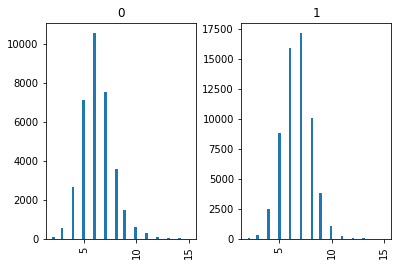

<Figure size 432x288 with 0 Axes>

In [ ]:
length=df['name'].apply(len)
df=df.assign(Length=length)

#Plot the distribution of the document length for each category

df.hist(column='Length',by='gender',bins=50)

plt.figure()

## Data Preparation

In [ ]:
text_train, text_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
text_train, text_test

(20648     darshelle
 70085    quanterius
 24285        domari
 14481      carriana
 31579      giorgina
             ...    
 21440      dearious
 73349         rocko
 50057      kristion
 5192     anastaisha
 77708       shamena
 Name: name, Length: 76020, dtype: object, 10657           benjemin
 15097               ceji
 74604               ryce
 61578            miamour
 56584           mackenna
               ...       
 71715             raynal
 20268          daquavion
 77406            shakena
 62540           mistique
 16898    christianalexan
 Name: name, Length: 19005, dtype: object)

In [ ]:
text_train, text_cv, y_train, y_cv = train_test_split(text_train, y_train, test_size=0.25, random_state=1)
text_train, text_cv, y_train, y_cv 

(6936         arbor
 76508    sebastino
 3408        alieza
 23257       devaeh
 41370      jhordyn
            ...    
 18951       cynthi
 72898          rie
 71615      rayella
 64259      nakysha
 41896     joeangel
 Name: name, Length: 57015, dtype: object, 66116      nikira
 42005      johary
 20601    darrilyn
 94381     zharick
 55120       lolar
            ...   
 39772      jazzel
 46093       kayke
 3701     allionna
 89595      venice
 30452       gaile
 Name: name, Length: 19005, dtype: object, 6936     1
 76508    0
 3408     1
 23257    1
 41370    1
         ..
 18951    1
 72898    1
 71615    1
 64259    1
 41896    0
 Name: gender, Length: 57015, dtype: object, 66116    1
 42005    0
 20601    1
 94381    1
 55120    1
         ..
 39772    1
 46093    0
 3701     1
 89595    1
 30452    1
 Name: gender, Length: 19005, dtype: object)

In [ ]:
tokenizer = Tokenizer(num_words=None,lower=True, char_level=True, oov_token='UNK')
tokenizer.fit_on_texts(text_train)

X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)
X_cv = tokenizer.texts_to_sequences(text_cv)

In [ ]:
X_train,X_test,X_cv

([[2, 6, 19, 11, 6],
  [8, 3, 19, 2, 8, 12, 5, 4, 11],
  [2, 7, 5, 3, 21, 2],
  [13, 3, 20, 2, 3, 9],
  [18, 9, 11, 6, 13, 10, 4],
  [12, 6, 3, 20],
  [11, 15, 5, 14, 2],
  [11, 7, 5, 8, 9, 2],
  [12, 3, 6, 6, 11, 13],
  [18, 3, 4, 4, 5, 25, 3, 6],
  [8, 2, 10, 7, 2, 6],
  [23, 2, 17, 4, 3, 12, 2],
  [4, 2, 7, 3, 2],
  [8, 9, 3, 4, 2],
  [3, 14, 11, 4, 12, 3],
  [15, 5, 14, 5, 2, 9],
  [15, 9, 2, 8, 5, 14],
  [21, 11, 3, 22, 6, 2, 16, 3],
  [13, 5, 2],
  [4, 2, 16, 11, 7, 3],
  [16, 11, 6, 2, 4],
  [8, 3, 8, 7, 3, 10],
  [7, 3, 11, 15, 2, 13, 10, 2],
  [7, 3, 4, 11, 5, 6],
  [3, 14, 14, 2, 4, 17, 3, 7, 7, 3],
  [2, 2, 6, 11, 4, 2, 3],
  [18, 3, 2, 4, 4, 10],
  [16, 7, 2, 6, 3, 4, 13, 11, 4],
  [6, 17, 14, 5],
  [2, 8, 9, 12, 2, 4],
  [10, 17, 5],
  [3, 6, 4, 5, 8, 12],
  [12, 2, 15, 2],
  [12, 10, 4, 3, 7, 7],
  [12, 2, 3, 20, 5, 4],
  [8, 17, 4, 25, 7, 11, 23, 3, 6],
  [6, 5, 3, 2, 4, 4, 2],
  [12, 2, 19, 2, 12, 2],
  [8, 3, 8, 5, 7, 10],
  [18, 8, 5, 2, 9],
  [13, 9, 2, 6, 5, 17, 8],

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # Adding 1 because of reserved 0 index
MAX_LEN =20
maxlen = MAX_LEN 

#Padding the sentences
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_cv = pad_sequences(X_cv, padding='post', maxlen=maxlen)

In [ ]:
X_train 

array([[ 2,  6, 19, ...,  0,  0,  0],
       [ 8,  3, 19, ...,  0,  0,  0],
       [ 2,  7,  5, ...,  0,  0,  0],
       ...,
       [ 6,  2, 10, ...,  0,  0,  0],
       [ 4,  2, 15, ...,  0,  0,  0],
       [18, 11,  3, ...,  0,  0,  0]], dtype=int32)

## Model:MLP

### Initial simple model with hidden layer with 32 units 

In [ ]:
#Define Basic model with hidden_dim=32
#create model
model = Sequential([
    Dense(32, input_dim=maxlen, activation='relu'),
    Dense(1, activation='sigmoid')           
])

#model compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.7207
Valuating Accuracy:  0.7209
{'val_loss': [0.6418495259451822, 0.6247286157870223, 0.6331704688116112, 0.5941445251823381, 0.5923091655136943, 0.573693707503008, 0.5706206178922335, 0.5545062285697765, 0.5545530486219779, 0.5557005643468254], 'val_accuracy': [0.6477242708206177, 0.6535648703575134, 0.6484609246253967, 0.6816627383232117, 0.6879242062568665, 0.705235481262207, 0.7041304707527161, 0.7116548418998718, 0.7129176259040833, 0.7209155559539795], 'loss': [0.7685409420667526, 0.6312372608110799, 0.616609413012448, 0.6027720417305638, 0.5905983216677028, 0.5778632312032995, 0.5698686838385244, 0.5627908151703613, 0.557307540460876, 0.5512827689434618], 'accuracy': [0.61638165, 0.65177584, 0.6624572, 0.6728756, 0.68483734, 0.69565904, 0.70002633, 0.70332366, 0.70783126, 0.71256685]}


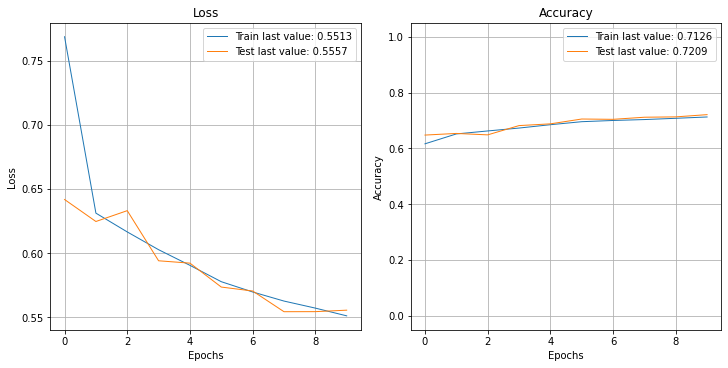

In [ ]:
#train model with differnt epochs
#epochs=10
hist = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=50)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Valuating Accuracy:  {:.4f}".format(accuracy))
plot_history(hist.history)
print(hist.history)

In [ ]:
word_represent =  tokenizer.texts_to_sequences(['Mary'])

In [ ]:
word_represent

[[14, 2, 6, 10]]

In [ ]:
x_pred = pad_sequences( word_represent, padding='post', maxlen=maxlen)

In [ ]:
model.predict(x_pred)

array([[0.46274668]], dtype=float32)

### Increase epochs allow model learning longer

Training Accuracy: 0.7639
Valuating Accuracy:  0.7594
Testing Accuracy:  0.7604


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9be018e7d0>,
       dtype=object))

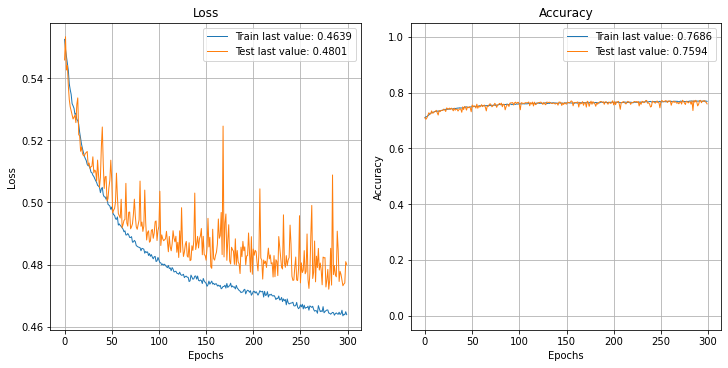

In [ ]:
#epochs=300
hist = model.fit(X_train, y_train,
                    epochs=300,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=50)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Valuating Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_cv, y_cv, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(hist.history)

### to improve accuracy, try different unit in hidden layer

In [ ]:
##In case of underfitting 
##making model more complex 
def MLP(hidden_dim, num_epochs=100):
    
    model = Sequential()
    model.add(Dense(hidden_dim, input_dim=maxlen, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    hist = model.fit(X_train, y_train,
                    
                    epochs=num_epochs,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=50) 
    
    loss, accuracy = model.evaluate(X_cv, y_cv, verbose=True)
    
    return hist.history, loss, accuracy

19005/19005 [==============================] - 1s 43us/step


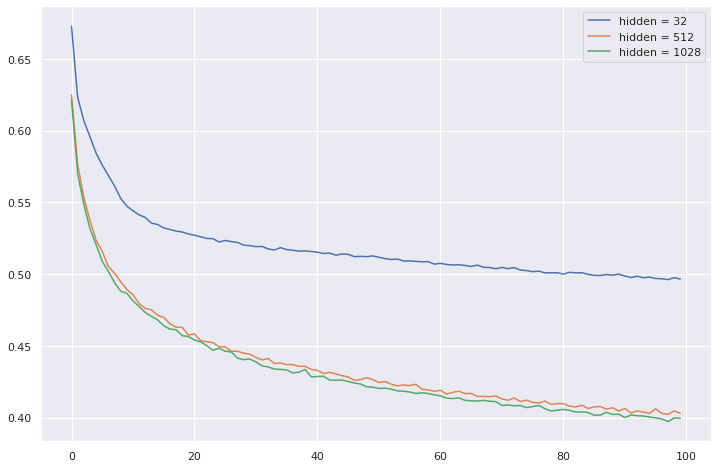

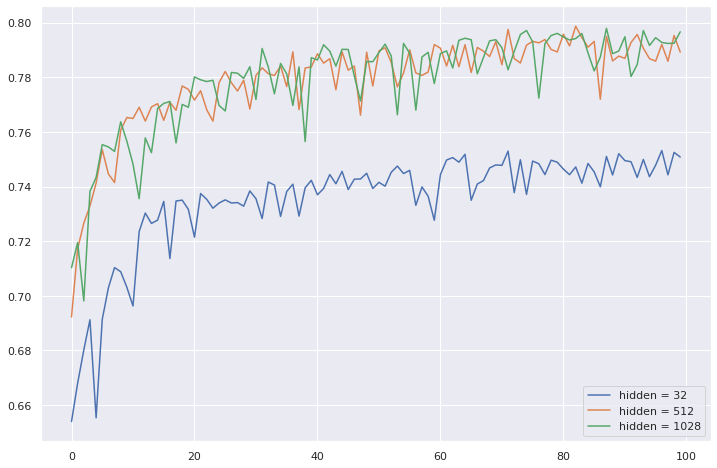

Testing Accuracy 512:  0.7939
Testing Accuracy 1028:  0.7984


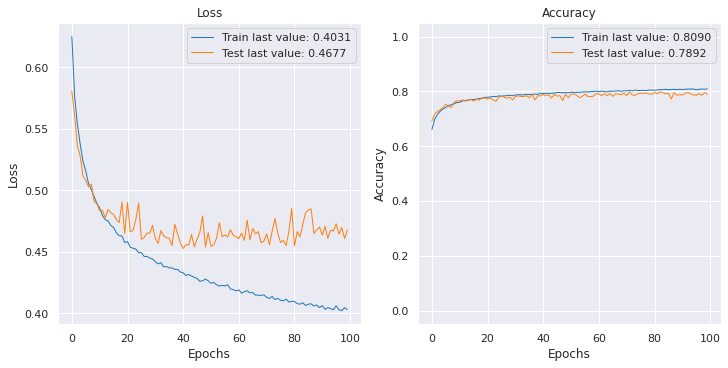

In [ ]:
#Increase the hidden dims

hist_h32,loss_h32,acc_h32 = MLP(32)
hist_h512,loss_h512,acc_h512 = MLP(512)
hist_h1028,loss_h1028,acc_h1028 = MLP(1028) 

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(12, 8)})

plt.plot(hist_h32['loss'], label='hidden = 32')
plt.plot(hist_h512['loss'], label='hidden = 512')
plt.plot(hist_h1028['loss'], label='hidden = 1028') 
plt.legend(loc='upper right')
plt.show()


plt.plot(hist_h32['val_accuracy'], label='hidden = 32')
plt.plot(hist_h512['val_accuracy'], label='hidden = 512')
plt.plot(hist_h1028['val_accuracy'], label='hidden = 1028') 
plt.legend(loc='lower right')
plt.show()


plot_history(hist_h512)
print("Testing Accuracy 512:  {:.4f}".format(acc_h512))
print("Testing Accuracy 1028:  {:.4f}".format(acc_h1028))

### choose 512 unit in hidden layer, the preformance for 1028 and 512 is simliar

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               10752     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 43,649
Trainable params: 43,649
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 0.8701
Valuating Accuracy:  0.8083
Testing Accuracy:  0.8073


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fea2f3c3950>,
       dtype=object))

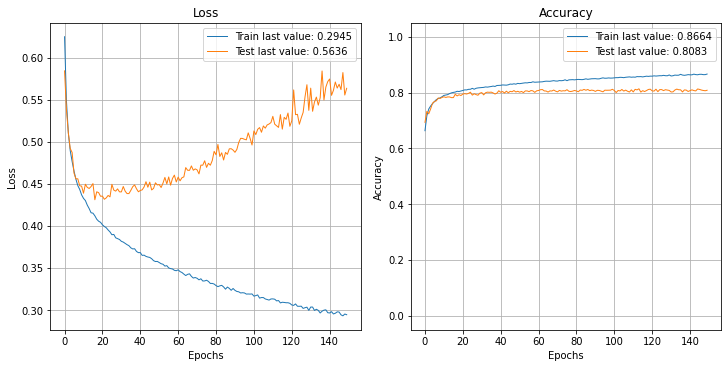

In [ ]:
##Still underfitting ? Add more layers

model = Sequential()
model.add(Dense(512, input_dim=maxlen, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

#epochs=150
hist = model.fit(X_train, y_train,
                    epochs=150,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=50)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Valuating Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_cv, y_cv, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist.history)


### from graph, the model is overfitting 
> add L2 regularizers

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               10752     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 43,649
Trainable params: 43,649
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 0.8145
Valuating Accuracy:  0.7976
Testing Accuracy:  0.7963


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fea2d1e3590>,
       dtype=object))

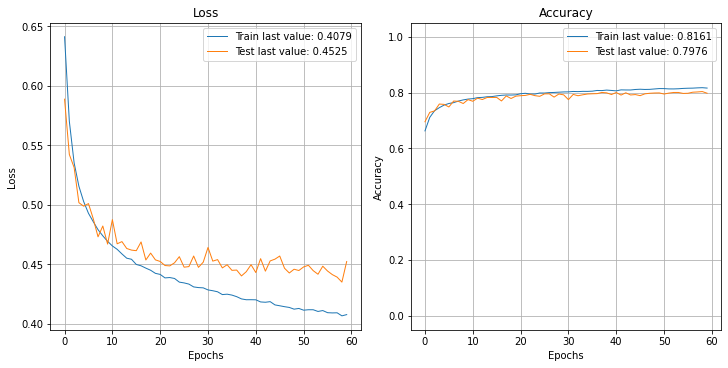

In [ ]:

# create model with 1st hidden lay 512 units, 2rd hidden lay 64. with L2 regularizers
model = Sequential()
model.add(Dense(512, input_dim=maxlen, activation='relu',
          kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

# epochs=60
hist = model.fit(X_train, y_train,
                 epochs=60,
                 verbose=False,
                 validation_data=(X_test, y_test),
                 batch_size=50)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Valuating Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_cv, y_cv, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(hist.history)

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb86af2350>,
       dtype=object))

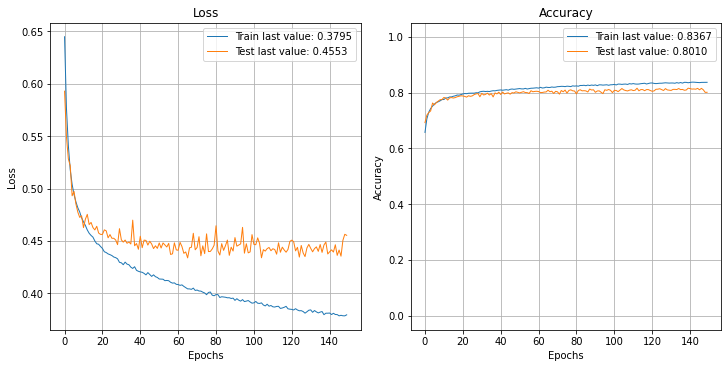

In [ ]:
plot_history(hist.history)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               10752     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 65        
Total params: 43,649
Trainable params: 43,649
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 0.8266
Valuating Accuracy:  0.8046
Testing Accuracy:  0.8099


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc732338890>,
       dtype=object))

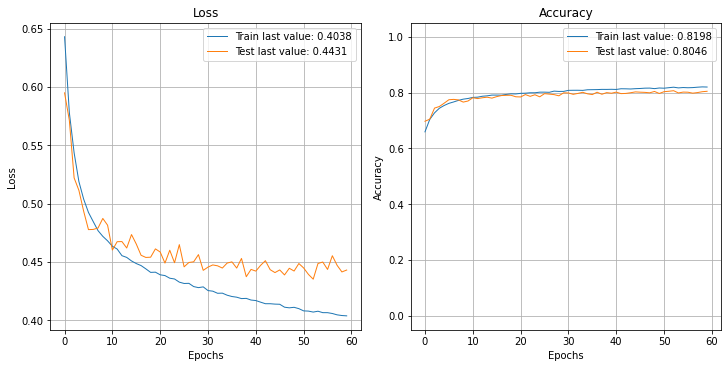

In [ ]:
# create model with 1st hidden lay 512 units, 2rd hidden lay 64. with L2 regularizers
model = Sequential()
model.add(Dense(512, input_dim=maxlen, activation='relu',
          kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

# epochs=60
hist = model.fit(X_train, y_train,
                 epochs=60,
                 verbose=False,
                 validation_data=(X_test, y_test),
                 batch_size=50)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Valuating Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_cv, y_cv, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(hist.history)

## Model:LSTM

initial LSTM model with 128 units and epochs =150

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Flatten, MaxPooling1D, Input, Concatenate, Dense, Embedding, Dense, Activation, Dropout, LSTM, Bidirectional
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1,l2

In [ ]:
vocab_size = len(word_index) + 1

In [ ]:
model =  Sequential()
# Add an Embedding layer expecting input vocab of size 42, and
# output embedding dimension of size 64.
model.add(Embedding(input_dim=42, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(LSTM(128))

# Add a Dense layer with 10 units.
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 64)          2688      
_________________________________________________________________
lstm_17 (LSTM)               (None, 128)               98816     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 101,633
Trainable params: 101,633
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Training Accuracy: 0.9978
Valuating Accuracy:  0.8932
Testing Accuracy:  0.8966


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7329e9090>,
       dtype=object))

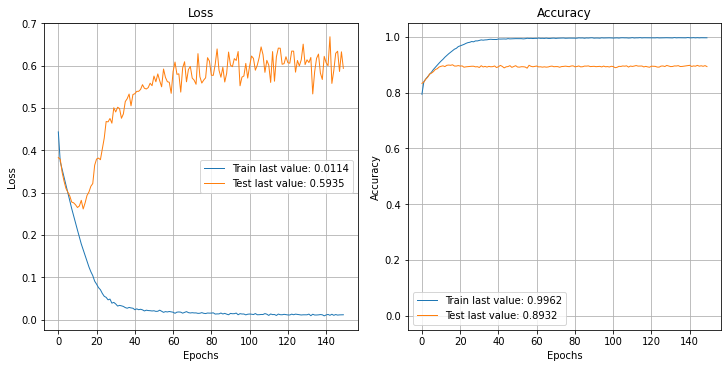

In [ ]:
hist = model.fit(X_train, y_train,
                    epochs=150,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=50)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Valuating Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_cv, y_cv, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist.history)


### From graph, the model is overfitting
> add l2 regularizer

### input shape

In [ ]:
model =  Sequential()
# Add an Embedding layer expecting input vocab of size 42, and
# output embedding dimension of size 64.
model.add(Embedding(input_dim=42, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(LSTM(128,recurrent_regularizer='l2'))

# Add a Dense layer with 10 units.
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, None, 64)          2688      
_________________________________________________________________
lstm_19 (LSTM)               (None, 128)               98816     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 129       
Total params: 101,633
Trainable params: 101,633
Non-trainable params: 0
_________________________________________________________________


### will choose this model to do predict with 88% Accuracy

Training Accuracy: 0.8943
Valuating Accuracy:  0.8809
Testing Accuracy:  0.8846


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7333afe50>,
       dtype=object))

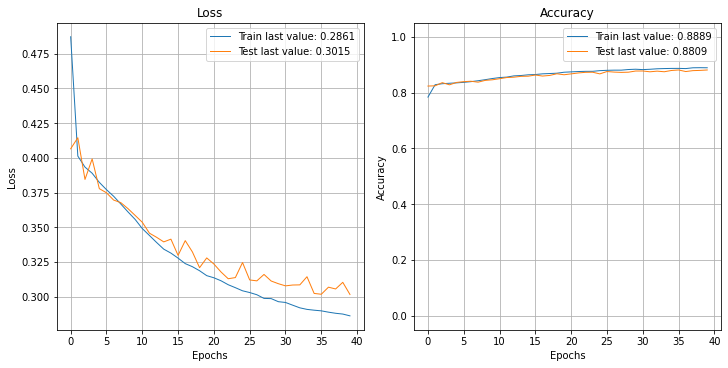

In [ ]:
hist = model.fit(X_train, y_train,
                    epochs=40,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=50)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Valuating Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_cv, y_cv, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist.history)

### Tuning model with  LSTM layer with 64 internal units.

In [ ]:
model =  Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(Embedding(input_dim=42, output_dim=64))

# Add a LSTM layer with 64 internal units.
model.add(LSTM(64,recurrent_regularizer='l1'))
 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, None, 64)          2688      
_________________________________________________________________
lstm_18 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 35,777
Trainable params: 35,777
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Training Accuracy: 0.8688
Valuating Accuracy:  0.8602
Testing Accuracy:  0.8647


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc732856910>,
       dtype=object))

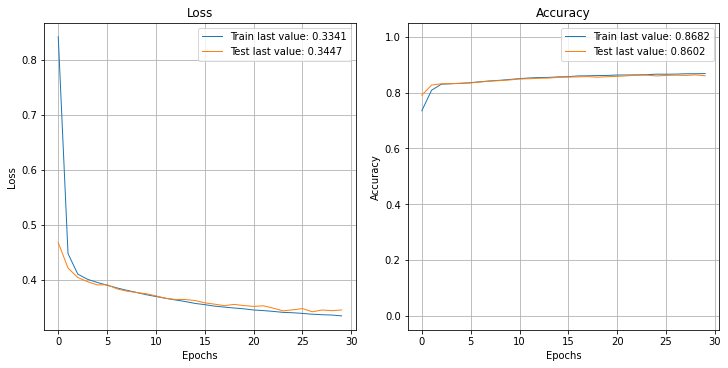

In [ ]:
hist = model.fit(X_train, y_train,
                    epochs=30,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=50)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Valuating Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_cv, y_cv, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist.history)